In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import umap

import sys
sys.path.append("../profiling/")
import profiling

In [2]:
NUM_FEATURES = 6400
INPUT_PROFILES = "data/well_level_data.csv"

In [3]:
wells = pd.read_csv(INPUT_PROFILES)
columns2 = [str(i) for i in range(NUM_FEATURES)]

# Well-level UMAP

In [4]:
reducer = umap.UMAP()
embeddings = reducer.fit_transform(wells[columns2])
aux = pd.concat((pd.DataFrame(embeddings, columns=["X", "Y"]), wells.reset_index()), axis=1)

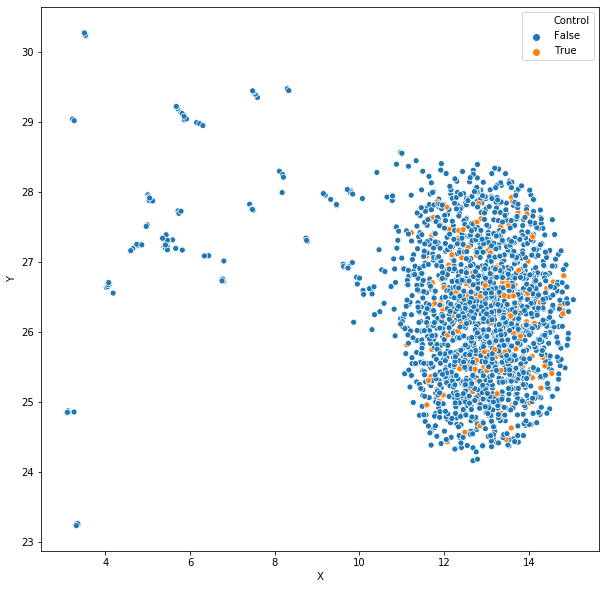

In [5]:
aux["Control"] = aux["pert_name"] == "EMPTY_" #["broad_sample"].isna()
plt.figure(figsize=(10,10))
sb.scatterplot(data=aux, x="X", y="Y", hue="Control")

# Treatment-level correlations

In [8]:
X, Y = profiling.load_correlation_matrix("data/correlation_matrix.csv")

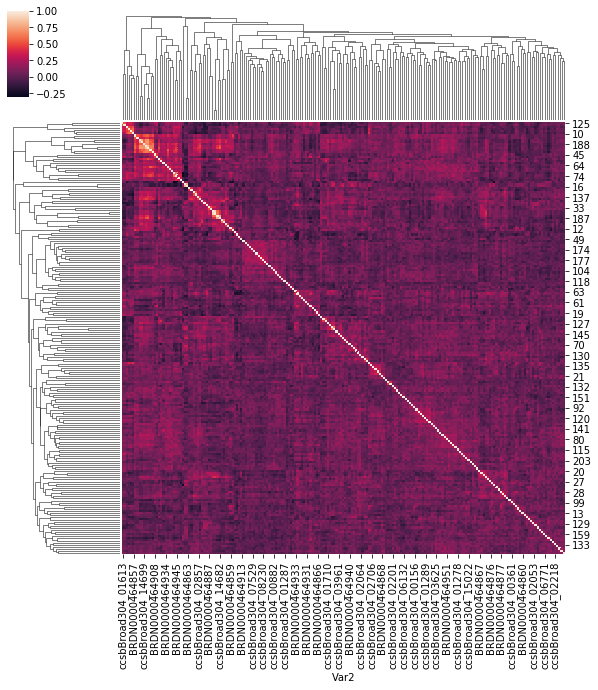

In [9]:
sb.clustermap(X[Y.Var1])

# MOA counts

In [10]:
Y.groupby("Metadata_moa.x")["Var1"].count()

Metadata_moa.x
Apoptosis                                  5
Autophagy                                  4
BMP                                        5
Cell Cycle                                 7
Chromatin Modifiers                        1
Circadian Rhythm                           6
Cytoskeletal Re-org                        5
DNA Damage                                 3
ER Stress/UPR                             12
Hedgehog                                   3
Hippo                                      7
Hypoxia                                   10
Insulin Receptor Signaling                 4
JAK/STAT                                   3
MAPK                                      28
Mitochondria Oxidative Phosphorylation     3
NFkB                                      18
NOTCH                                      8
PI3K/AKT                                  13
PKA                                        9
PKC                                        3
RTK                                     